# Week 3: Data Visualization

An important skill in urban data science is visualizing data in a meaningful way. This can refer to the raw, input data you collect or to the data created through some analysis. In this notebook, we will cover choosing and plotting different graph types depending on the data you have and creating legible, accurate plots. 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## 3.1 Different Plot Types

First, let's load in some data of NYC bike share data from 2013. Go into this week's folder on Canvas and download the file "201307_citibike_tripdata.csv". 

Information on the data:
* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Station ID
* Station Lat/Long
* Bike ID
* User Type (0 = 24-hour pass or 3-day pass user; 1 = Annual Member)
* Gender (Zero=unknown; 1=male; 2=female)
* Year of Birth

In [3]:
df = pd.read_csv('/Users/madilore/Documents/Cornell/Course Materials/IUS/2026/201307_citibike_tripdata.csv')

In [5]:
# Let's look at what is in the data
df.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,40.753231,-73.970325,504,40.732219,-73.981656,16950,0,NaN,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,40.749718,-74.002950,459,40.746745,-74.007756,19816,0,NaN,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,40.730287,-73.990765,237,40.730473,-73.986724,14548,1,1980.0,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,40.718939,-73.992663,499,40.769155,-73.981918,16063,0,NaN,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,40.734927,-73.992005,410,40.720664,-73.985180,19213,1,1986.0,1


In [7]:
# Check on missing data, it looks like "birth year" is an unreliable variable
df.isna().sum(axis=0)

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station latitude          0
start station longitude         0
end station id                  0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 174887
gender                          0
dtype: int64

In [10]:
# Check on the data types of each column
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station latitude     float64
start station longitude    float64
end station id               int64
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                     int64
birth year                 float64
gender                       int64
dtype: object

In [12]:
# Right now our starttime and stoptime are string objects
# We want these to be datetime objects

df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station latitude            float64
start station longitude           float64
end station id                      int64
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                            int64
birth year                        float64
gender                              int64
dtype: object

Sometimes we want to create a new variable from another. For example, let's say we want to count how many trips are taken per day, but we don't care about the time. 

We can **apply** a function to all the values in a column using:
```
df['new_col_name'] = df['old_col_name'].apply(lambda x: function(x))
```

`.apply(lambda x: )` is the basic form for how we apply any type of function. This can be a function we write ourselves, or one in a package. 

In [13]:
# Let's look at the number of trips per day over the month
# We'll create a new variable with just the date
df['startdate'] = df['starttime'].apply(lambda x: x.date())
df.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,40.753231,-73.970325,504,40.732219,-73.981656,16950,0,NaN,0,2013-07-01
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,40.749718,-74.002950,459,40.746745,-74.007756,19816,0,NaN,0,2013-07-01
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,40.730287,-73.990765,237,40.730473,-73.986724,14548,1,1980.0,2,2013-07-01
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,40.718939,-73.992663,499,40.769155,-73.981918,16063,0,NaN,0,2013-07-01
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,40.734927,-73.992005,410,40.720664,-73.985180,19213,1,1986.0,1,2013-07-01


In [14]:
# We can see how many days we have
df['startdate'].nunique() # This means the number of unique entries in this col

31

In [20]:
# Now let's get a tmp dataframe with counts per day
counts_perday = df.groupby('startdate').apply(len) 
counts_perday.head()

/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/45520356.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts_perday = df.groupby('startdate').apply(len)


startdate
2013-07-01    16650
2013-07-02    22745
2013-07-03    21864
2013-07-04    22326
2013-07-05    21842
dtype: int64

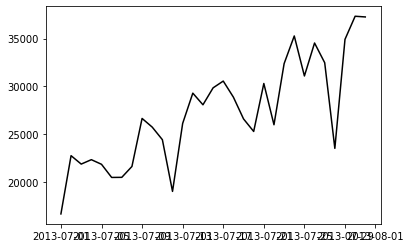

In [21]:
# We can plot a line plot over time
plt.plot(counts_perday.index, counts_perday.values, '-', color='black')

This plot is fine, but the axes are hard to read and it is overall not very pretty.
We can make our plots much more appealing and easy to read. 

In [64]:
# First we can set some global parameters to make the fonts easier to read

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE,family='Times New Roman')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 120         # resolution of image in output

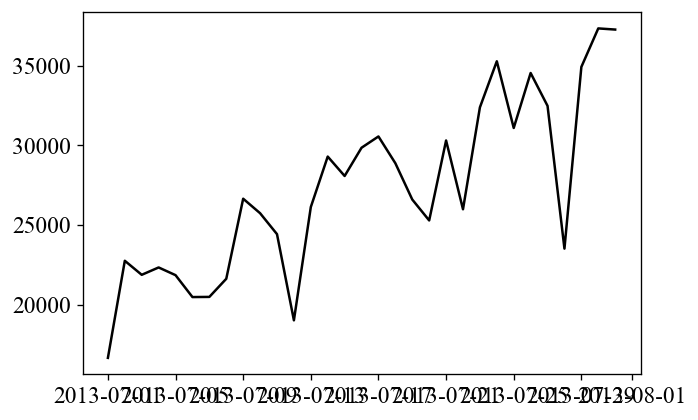

In [65]:
plt.plot(counts_perday.index, counts_perday.values, '-', color='black')

(15887.0, 15917.0)

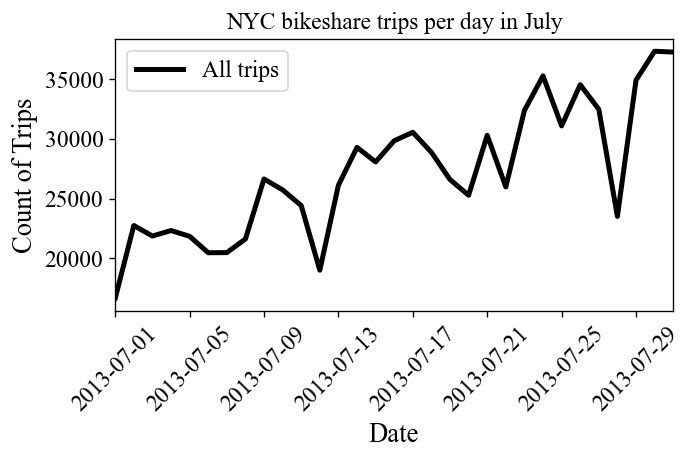

In [77]:
# Now we can add figure-specific parameters
fig, ax = plt.subplots(figsize=(6,3)) # width, height
plt.plot(counts_perday.index, counts_perday.values, '-', color='black', linewidth=3, label="All trips")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count of Trips')
plt.legend()
plt.title('NYC bikeshare trips per day in July')
plt.xlim(counts_perday.index.min(), counts_perday.index.max())

In [ ]:
## YOUR TURN 
# Fill in the code below to create two lines, one for short term passes counts per day
shortterm = 
# And one for annual passes counts per day 
annual = 
fig, ax = plt.subplots(figsize=(8,4)) # width, height
# Plot each group, choose a color

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count of Trips')
plt.title('NYC bikeshare trips per day in July')

## Distributions

We can plot the distribution of different variables. 

In [86]:
# Let's look at some of our variables
df['tripduration'].describe().apply(lambda x: format(x, 'f')) # This last part displays the values as floats

count     843416.000000
mean         998.100704
std         7146.789564
min           60.000000
25%          444.000000
50%          729.000000
75%         1202.000000
max      6250750.000000
Name: tripduration, dtype: object

Wow, I think there are some outliers! We can look at more quantiles to see what is reasonable.

In [99]:
# Let's look at the 99% percentile value. This means 99% of the values are less than this.
df['tripduration'].quantile(.99) / 60 # in minutes

72.89749999999961

<Axes: ylabel='Frequency'>

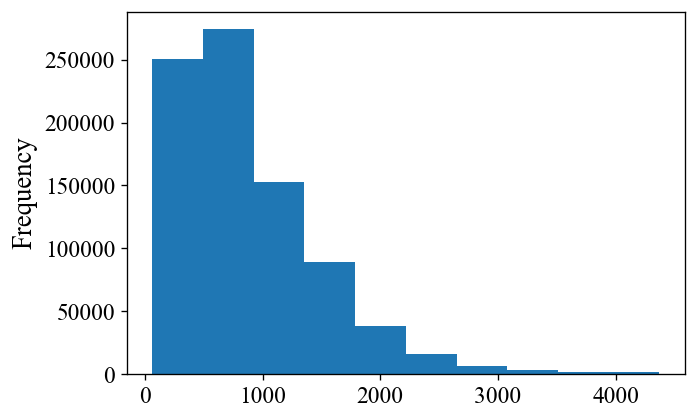

In [105]:
# Okay, let's just plot 99% of the data then

q99 = df['tripduration'].quantile(.99)
df[df['tripduration'] <= q99]['tripduration'].plot(kind='hist')

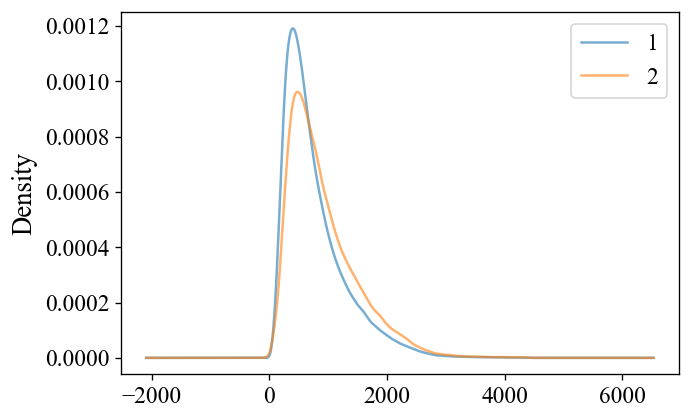

In [109]:
# We can also look at distributions directly from our dataframe
# Who takes longer rides, males or females? 
df[(df['tripduration'] <= q99) & (df['gender'] != 0)].groupby('gender')['tripduration'].plot(kind='kde', alpha=0.6)
plt.legend()

In [110]:
## YOUR TURN 
## Explore one or more variables with one of the following plot types:
## kind = box, kde, hist, line, scatter, bar, barh
## Make sure it looks clear and legible! 


## 3.2 Heatmaps

One package for plotting is called `seaborn`. I really recommend checking out all of their tools: https://seaborn.pydata.org/examples/index.html. 

One plot we can build is called a heatmap. 

Let's build one to look at the day of week and time of day people use the bikeshare. 

In [120]:
df['start_dow'] = df['starttime'].dt.dayofweek # 0=Monday, 6=Sunday
df['start_hour'] = df['starttime'].dt.hour #0=midnight, 23=11pm
df.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,Start DoW,Start_DoW,Start_Time,Start_hour,start_dow,start_hour
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,40.753231,-73.970325,504,40.732219,-73.981656,16950,0,NaN,0,2013-07-01,0,0,00:00:00,0,0,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,40.749718,-74.002950,459,40.746745,-74.007756,19816,0,NaN,0,2013-07-01,0,0,00:00:02,0,0,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,40.730287,-73.990765,237,40.730473,-73.986724,14548,1,1980.0,2,2013-07-01,0,0,00:01:04,0,0,0
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,40.718939,-73.992663,499,40.769155,-73.981918,16063,0,NaN,0,2013-07-01,0,0,00:01:06,0,0,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,40.734927,-73.992005,410,40.720664,-73.985180,19213,1,1986.0,1,2013-07-01,0,0,00:01:10,0,0,0


In [174]:
#create day of week / hour of day matrices

# Let's build a function so we can run for different column types
# Required inputs go first, optional inputs go second

def build_matrix(df, col_value=None, col_name=None):
    """
    Count bikeshare totals for day of week / hour of day combo.
    df = dataframe
    col_value = group to care about, optional
    col_name = name of column group is in, optional
    """
    if col_value is not None:
        tmp = df[df[col_name] == col_value] # if not None, subset to group
    else:
        tmp = df.copy() # Otherwise, use the whole dataframe
        
    matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len) # Get the counts by DoW AND time
    matrix = matrix.reset_index()
    matrix = matrix.rename(columns={0:'timecount'}) # The counts need a new column name
    matrix = matrix.sort_values(by=['start_dow', 'start_hour']) # Make sure it goes M->Su and 0:00->23:00
    matrix = matrix.pivot(index='start_dow', columns='start_hour') # Set rows as DoW and columns as Time
    matrix = matrix.fillna(0) # If we are missing any Dow and Time combos (unlikely)
    return matrix

In [175]:
# We can also build a function for plotting!

def plot_matrix(matrix):
    """
    Plot the day of week / hour of day matrix
    """
    daysofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix.values, yticklabels=matrix.index, xticklabels = [str(x)+":00" for x in range(0,24)])
    plt.xlabel('Start Time')
    plt.ylabel('Start Day')
    plt.xticks(rotation=45)
    plt.yticks(range(7), daysofweek, rotation=0)
    plt.tight_layout()


/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/3149909633.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len) # Get the counts by DoW AND time


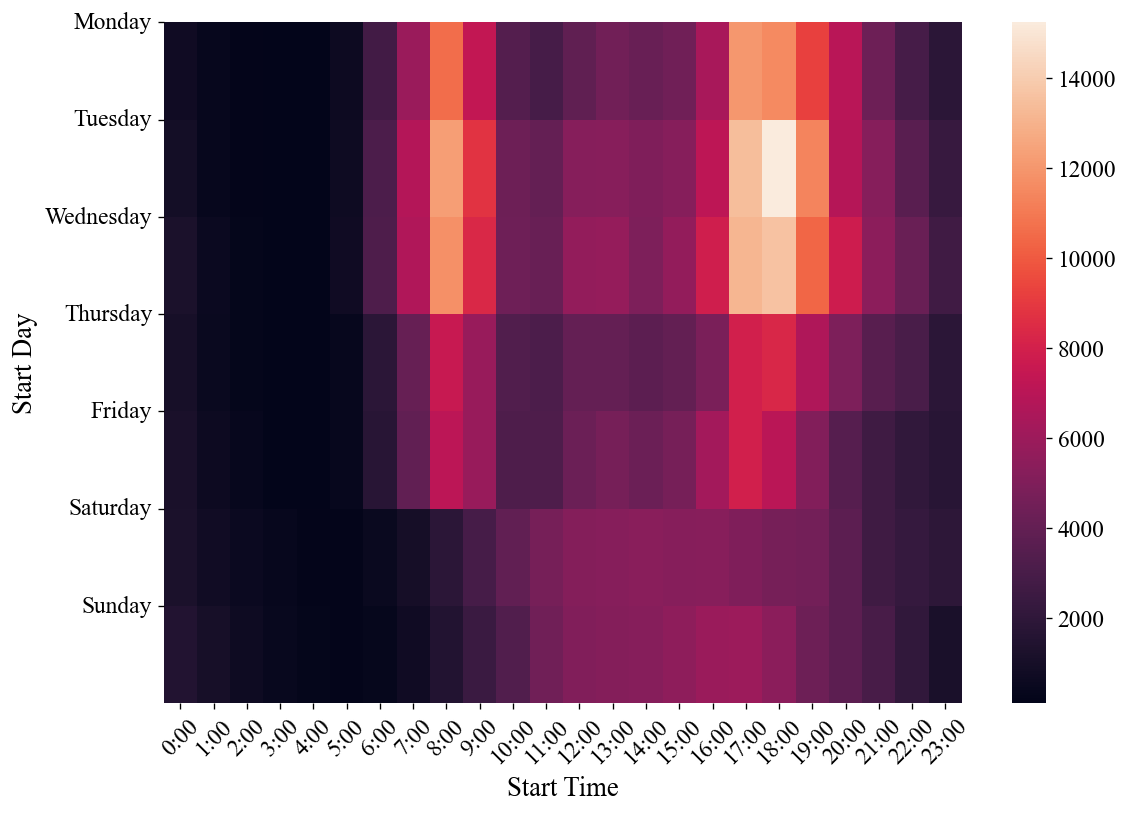

In [176]:
# Let's visualize it for annual members
annual_matrix = build_matrix(df, col_value=1, col_name='usertype')
plot_matrix(annual_matrix)

/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/3149909633.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len) # Get the counts by DoW AND time
/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/3149909633.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len)

Text(0.5, 1.0, 'Casual Riders')

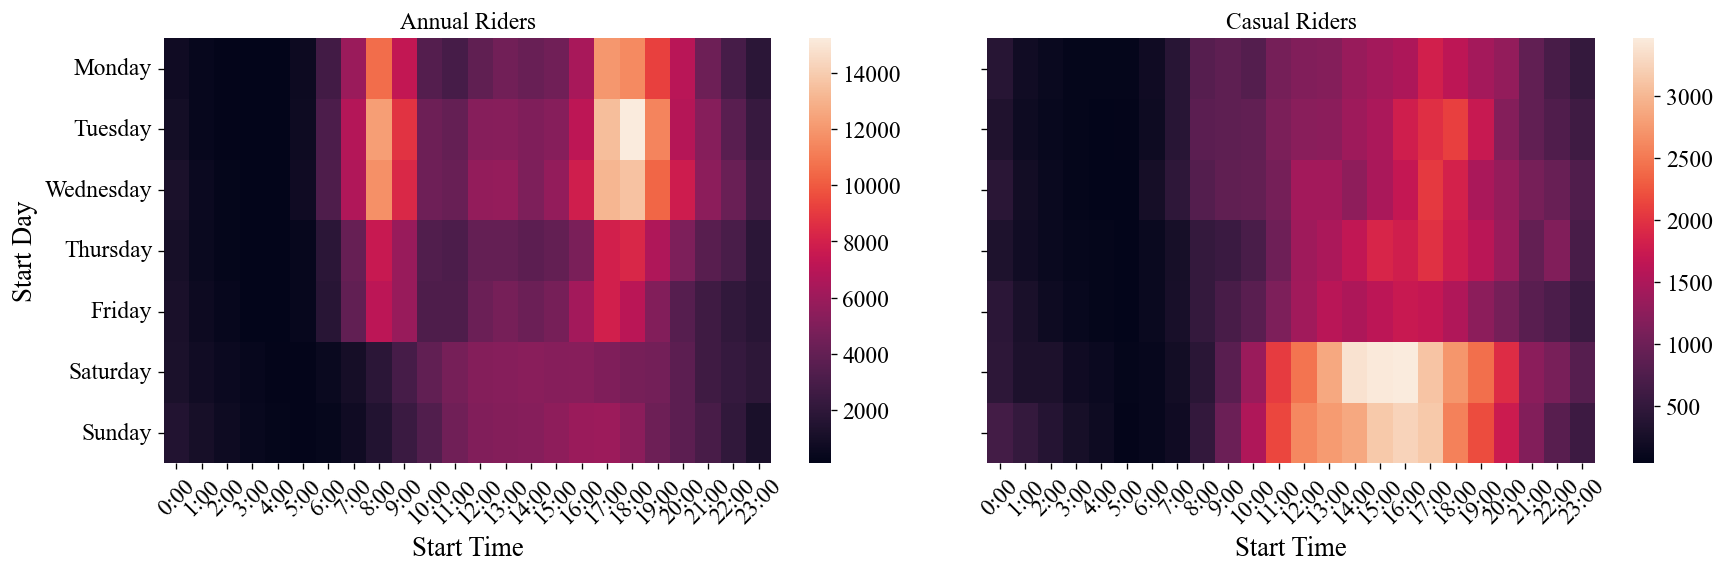

In [186]:
# Let's plot annual and casual members next to each other
annual_matrix = build_matrix(df, col_value=1, col_name='usertype')
casual_matrix = build_matrix(df, col_value=0, col_name='usertype') # now col_value=0

# We are going to create two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # ncols=2 for two columns

# First plot
sns.heatmap(annual_matrix.values, ax=axes[0], xticklabels = [str(x)+":00" for x in range(0,24)])
axes[0].set_xlabel('Start Time') # see how plt. has been replaced with axes[0]
axes[0].set_ylabel('Start Day')
axes[0].set_xticklabels([str(x)+":00" for x in range(0,24)], rotation=45)
axes[0].set_yticklabels(daysofweek, rotation=0)
axes[0].set_title('Annual Riders')
plt.tight_layout()

plt.subplot(122)
sns.heatmap(casual_matrix.values, ax=axes[1], xticklabels = [str(x)+":00" for x in range(0,24)])
axes[1].set_xticklabels([str(x)+":00" for x in range(0,24)], rotation=45)
axes[1].set_yticklabels([])
axes[1].set_xlabel('Start Time')
axes[1].set_title('Casual Riders')


/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/3149909633.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len) # Get the counts by DoW AND time
/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/3149909633.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = tmp.groupby(['start_dow', 'start_hour']).apply(len)

Text(0.5, 1.0, 'Post 1980 Riders')

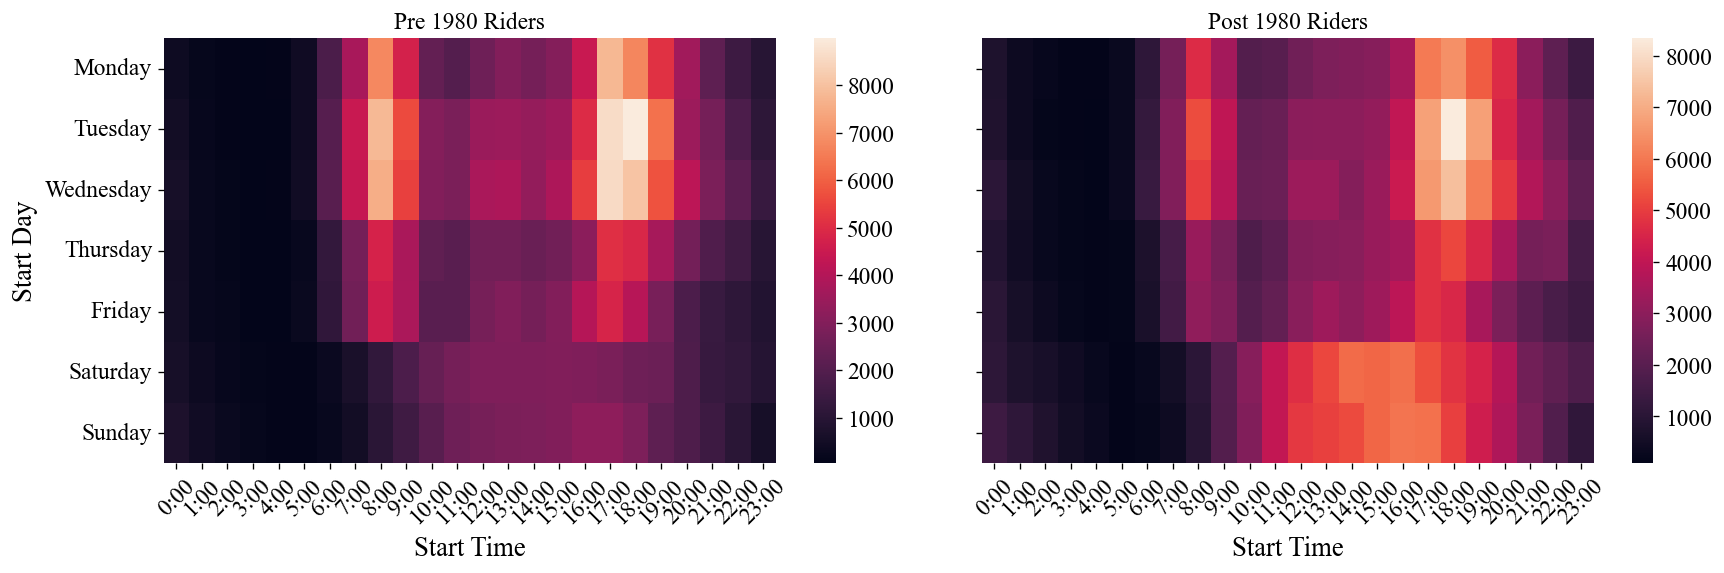

In [187]:
## YOUR TURN! 
## Explore the heatmaps by gender? or maybe by birth year for annual members?

df['pre1980'] = df['birth year'] <= 1980
matrix1 = build_matrix(df, col_name='pre1980', col_value=True)
matrix2 = build_matrix(df, col_name='pre1980', col_value=False)


# Let's plot them next to each other
fig, axes = plt.subplots(ncols=2, figsize=(15, 5)) # ncols=2 for two columns

sns.heatmap(matrix1.values, ax=axes[0], xticklabels = [str(x)+":00" for x in range(0,24)])
axes[0].set_xlabel('Start Time')
axes[0].set_ylabel('Start Day')
axes[0].set_xticklabels([str(x)+":00" for x in range(0,24)], rotation=45)
axes[0].set_yticklabels(daysofweek, rotation=0)
axes[0].set_title('Pre 1980 Riders')
plt.tight_layout()

plt.subplot(122)
sns.heatmap(matrix2.values, ax=axes[1], xticklabels = [str(x)+":00" for x in range(0,24)])
axes[1].set_xticklabels([str(x)+":00" for x in range(0,24)], rotation=45)
axes[1].set_yticklabels([])
axes[1].set_xlabel('Start Time')
axes[1].set_title('Post 1980 Riders')

## 3.3 Nice plots in seaborn

Seaborn can up your plotting game significantly by cleaning up your visualizations to reduce clutter, make soft and visually appealing lines, and work nicely with color pallettes. Technically, all of this is possible in matplotlib as well, but seaborn has done all of the backend work for us, so let's explore.

/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/19393775.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts_perday = df.groupby(['startdate', 'gender']).apply(len).reset_index()


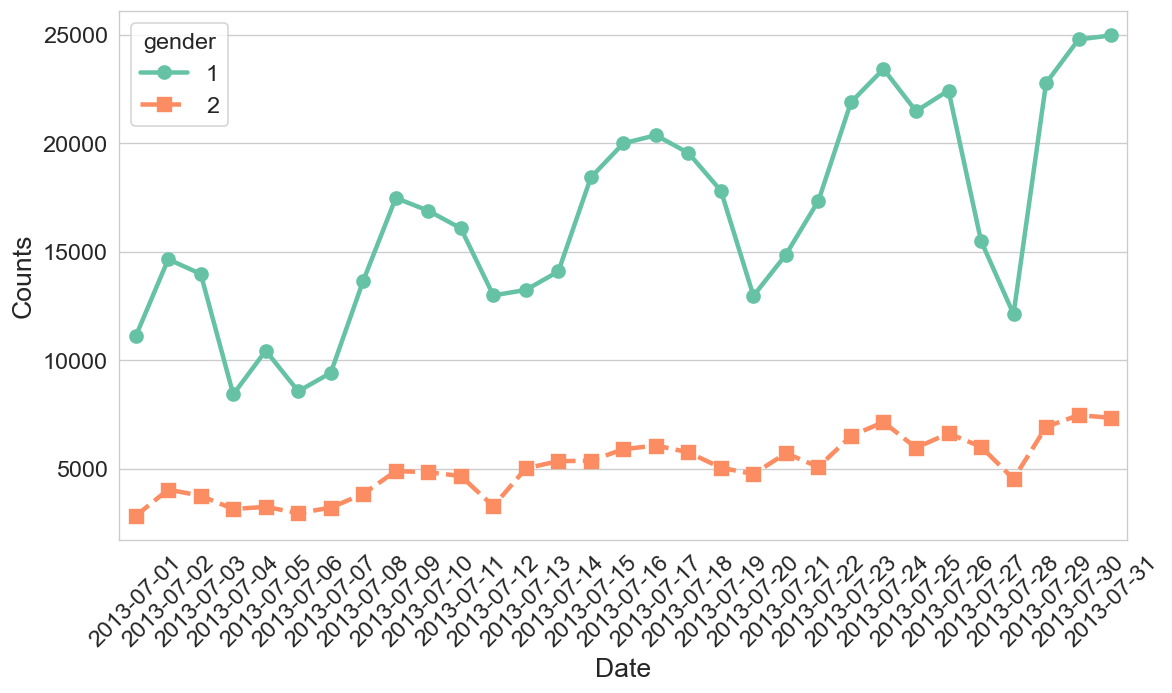

In [214]:
## Line charts
counts_perday = df.groupby(['startdate', 'gender']).apply(len).reset_index()
counts_perday = counts_perday[counts_perday['gender'] != 0] #exclude unknowns
counts_perday = counts_perday.rename(columns={0:'counts'})

plt.figure(figsize=(10,6))
sns.pointplot(
    data=counts_perday, x="startdate", y="counts", hue="gender",
    palette="Set2", markers=["o", "s"], linestyles=["-", "--"]).set(
    xlabel='Date', ylabel='Counts')
plt.xticks(rotation=45)
plt.tight_layout()

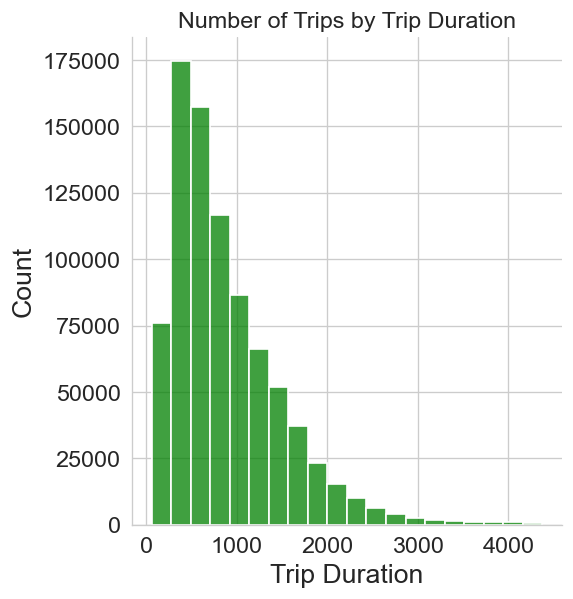

In [193]:
## Histograms
sns.set_style("whitegrid") # set style to make plots look nicer

# Filter the data
trips_duration = df.loc[df["tripduration"] <= q99, :]

# Create the plot, with 20 bins, and make it green
sns.displot(trips_duration['tripduration'],
            bins = 20,
            color = "green"
            ).set(title = "Number of Trips by Trip Duration", xlabel="Trip Duration")

sns.despine() # get rid of plot borders for cleaner look

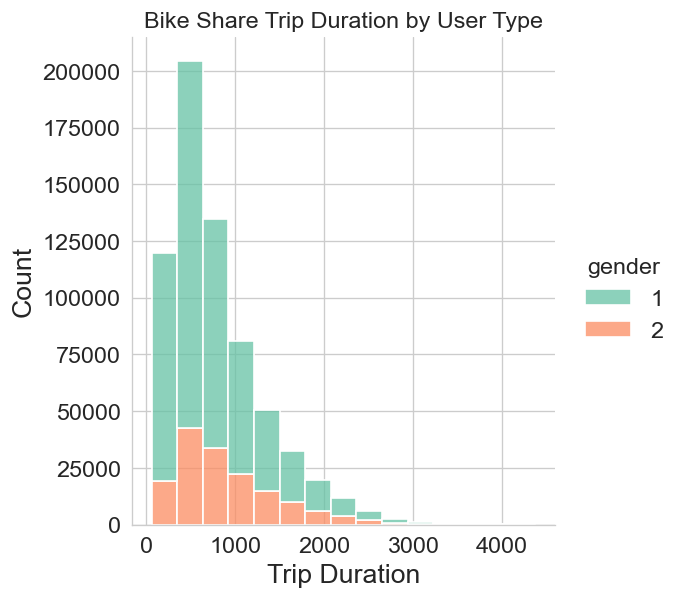

In [218]:
## Stacked histogram

sns.displot(data=trips_duration[trips_duration['gender'] != 0],
            x="tripduration",
            multiple="stack",
            bins=15,
            hue="gender",
            palette="Set2"
            ).set(title = "Bike Share Trip Duration by User Type", xlabel="Trip Duration")
sns.despine()

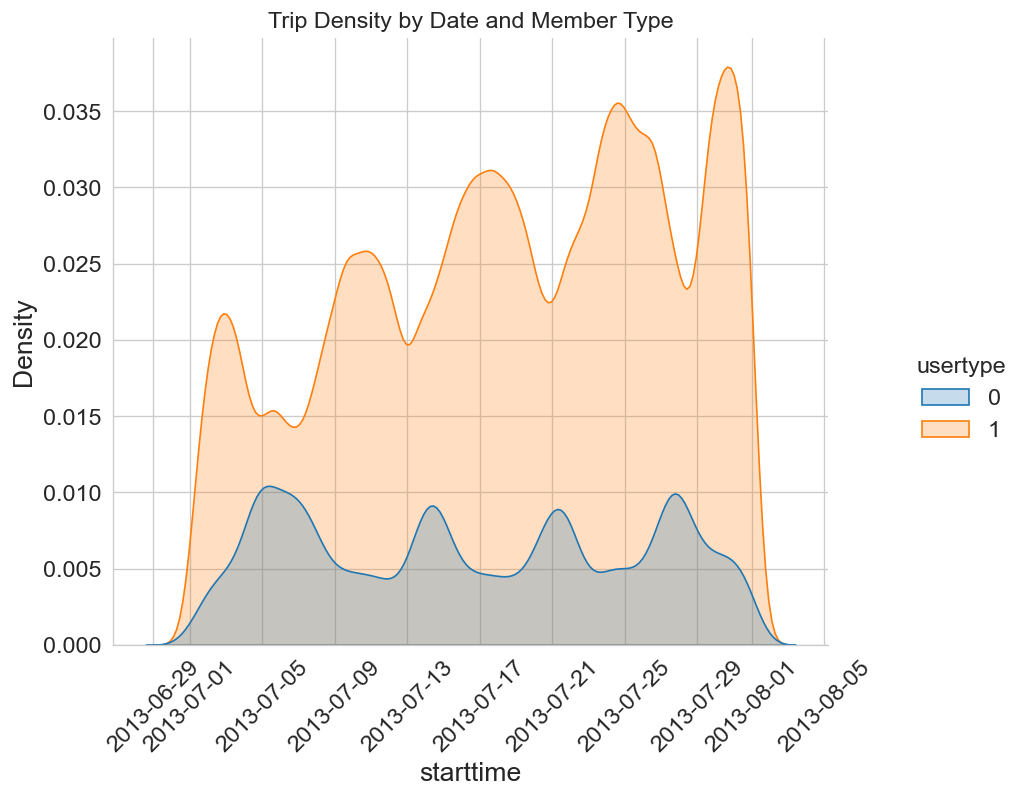

In [222]:
# Kernel Density Estimate (KDE)

sns.displot(trips_duration, 
            x="starttime", 
            hue="usertype", # try commenting this out and see what happens
            kind="kde", 
            fill=True,
            height=6, 
            aspect=11/8.5
            ).set(title = "Trip Density by Date and Member Type")
plt.xticks(rotation=45)
sns.despine()

In [ ]:
## YOUR TURN
## Explore other seaborn chart styles
## Group, filter, expand the data in any way you want


/var/folders/p3/nl4g9f296vj7y7kcrk8f76380000gn/T/ipykernel_7582/1739679050.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matrix = df.groupby(['startdate', 'end station id']).apply(len).reset_index()


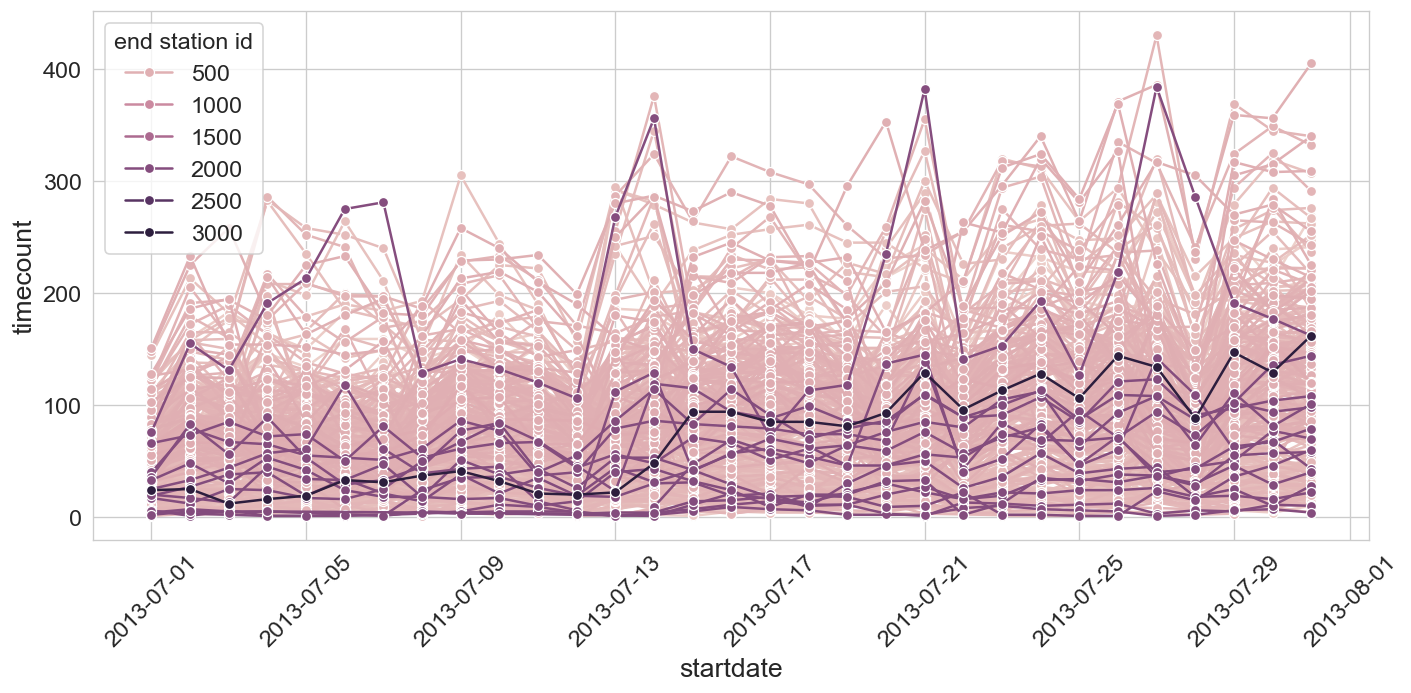

In [235]:
matrix = df.groupby(['startdate', 'end station id']).apply(len).reset_index()
matrix = matrix.rename(columns={0:'timecount'}) # The counts need a new column name
plt.figure(figsize=(12,6))
sns.lineplot(data=matrix, x='startdate', y='timecount', hue='end station id', marker='o', color='grey')
plt.xticks(rotation=45)
plt.tight_layout()


In [224]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station latitude', 'start station longitude', 'end station id',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'startdate', 'Start DoW', 'Start_DoW',
       'Start_Time', 'Start_hour', 'start_dow', 'start_hour', 'pre1980'],
      dtype='object')